<a href="https://colab.research.google.com/github/lacouth/metodos_numericos/blob/master/interpolacao/Interpola%C3%A7%C3%A3o_Curva_de_Resposta_ACS712_(modelo_projeto).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # <font color='blue' style='font-size: 30px;'> ACS712</font>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O circuito integrado ACS712  é um sensor de efeito Hall, que permite a conversão de uma grandeza de corrente elétrica para um valor de tensão por meio da interação com um campo magnético</p>

<p align="center">
  <img src="https://uploads.filipeflop.com/2017/07/001-3-600x600.png" alt="Logo"  width = "300dp" height = "300dp"/>
</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O módulo ACS712  oferece conexões mais amigáveis fixando o circuito integrado homônimo numa pequena placa contendo três header pins e um conector para dois fios para correntes maiores da ordem de alguns àmperes. </p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> 
O seu datasheet (<a>https://www.sparkfun.com/datasheets/BreakoutBoards/0712.pdf</a>) promete uma curva de resposta linear, no entanto, a precisão está associada a uma série de fatores construtivos, o que pode variar de dispositivo para dispositivo.A fim de caracterizar o sensor, foi realizado um ensaio, obtendo valores de corrente e suas saídas em tensao no sensor. O detalhamento do aparato experimental pode ser tido em <a>https://drive.google.com/open?id=1OpydzGrCp36_ZvA3r5zxreVBdS6h1pYz</a> na Secção <i>3.2 Aparato experimental</i>
</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> 
Utilizaremos o metódo de interpolação para obter a curva de resposta total, uma vez que temos um conjunto de pontos e desejamos obter os valores intermediários entre estes
</p>




## Bibliotecas

In [0]:
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np

# <font color='green' style='font-size: 30px;'>Conhecendo os dados</font>
<hr style='border: 2px solid red;'>


<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>X</b> - Dados de tensão recebidos na saída do sensor</li>
    <li><b>Y</b> - Corrente na entrada do sensor </li>
</ul>

In [0]:
x = np.array([0.9,1,1.1,1.2,1.3,1.4,1.55,1.6,1.7,1.8,1.9,2.2,2.3,2.4,2.6,2.7,2.8])
y = np.array([0.14,0.2,0.3,0.4,0.5,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8])

pd.DataFrame({ 'Tensão' : x, 'Corrente' : y})


,Tensão,Corrente
0,0.90,0.14
1,1.00,0.20
2,1.10,0.30
3,1.20,0.40
4,1.30,0.50
5,1.40,0.70
6,1.55,0.80
7,1.60,0.90
8,1.70,1.00
9,1.80,1.10


### Visualização gráfica

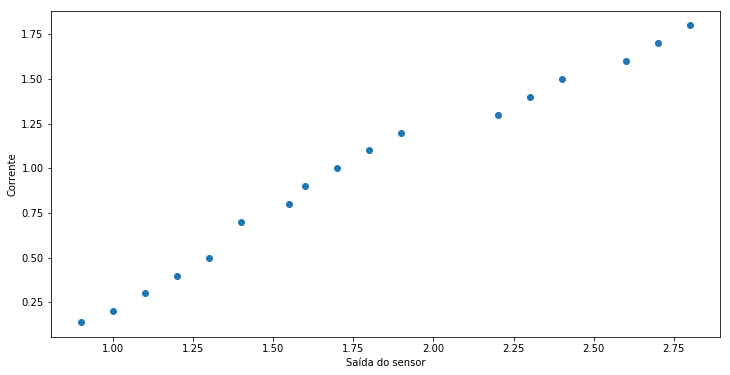

In [0]:
plot.figure(figsize=(12,6))
plot.plot(x,y,'o')
plot.xlabel('Saída do sensor')
plot.ylabel('Corrente')
plot.show()

# <font color='green' style='font-size: 30px;'>Metódos clássicos</font>
<hr style='border: 2px solid red;'>

### Metódo Direto

#### Implementação

*Funções*

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>montarMatriz</b> - Retorna a matriz       
      $m = \begin{bmatrix}
        1 && x_0  && x_0^2 && ... && x_n^n
       \\
       1 && x_1  && x_1^2 && ... && x_1^n
       \\
       \vdots && \vdots && \vdots && && \vdots
       \\
       1 && x_0  && x_0^2 && ... && x_n^n
      \end{bmatrix}
      $     
      
   </li>
    <li><b>coefDireto</b> - Resolve o sistema $m\begin{bmatrix}
        a_0 
       \\
       a_1
       \\
       \vdots
       \\
       a_n
      \end{bmatrix} = \begin{bmatrix}
        y_0 
       \\
       y_1
       \\
       \vdots
       \\
       y_n
      \end{bmatrix}$,
      adquirindo os coeficientes $a_i$ do polinômio</li>
    <li><b>pol</b> - Evalua o valor de $P(x) = coef_nx^n+coef_{n-1}x^{n-1}+...+coef_1x+coef_0$ </li>
</ul>

#### Geração da saída

In [0]:
coeficentes_direto = coefDireto(x,y)


x_direto = np.linspace(x[0]-.5, x[-1]+.5, num=50, endpoint=True)
y_direto = pol(coeficentes_direto,x_direto)

#### Resultados

In [0]:
print('Polinômio interpolador:\n')

print('{:.2f}* x^2 + {:.2f}* x + {:.2f}, \t\t {:.2f} <= x <= {:.2f}'.format(coeficentes_direto[0],coeficentes_direto[1],coeficentes_direto[2],x[0],x[-1]))

Polinômio interpolador:

-1505348150.50* x^2 + 15207366930.74* x + -71368906426.11, 		 0.90 <= x <= 2.80


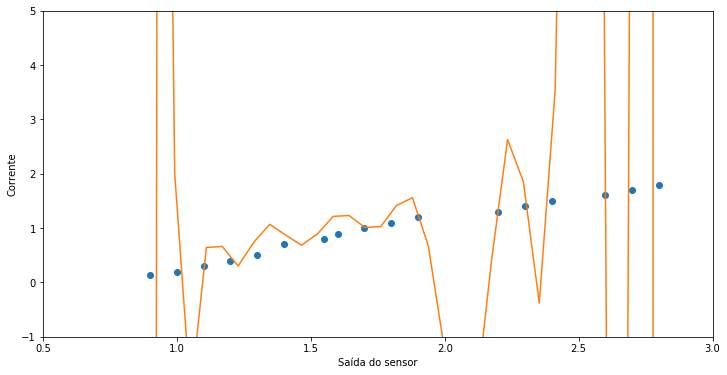

In [0]:
plot.figure(figsize=(12,6))
plot.axis([.5, 3, -1, 5])
plot.xlabel('Saída do sensor')
plot.ylabel('Corrente')
plot.plot(x,y,'o',x_direto,y_direto,'-')


### Metódo de Lagrange

#### Implementação

*Funções*

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>montarMatrizG</b> - Retorna a matriz $G = \begin{bmatrix}
    (x-x_1) & (x_1-x_2) & (x_1-x_3) & (x_1-x_4) \\
    (x_2-x_1) & (x-x_2) & (x_2-x_3) & (x_2-x_4) \\
    (x_3-x_1) & (x3-x_2) & (x-x_3) & (x_3-x_4) \\
    (x_4-x_1) & (x4-x_2) & (x_4-x_3) & (x-x_4) \\
    \end{bmatrix}$</li>
    <li><b>coefLagrange</b> - Retorna $a_i =\dfrac{G_d}{G_i} $</li>, em que $G_d = \prod_{i=1}^n G[i,i]$ e 
$G_i = \prod_{j=1}^n G[i,j]$
    <li><b>polLagrange</b> - Utiliza os coegicientes de lagrange para evaluar o valor de $P(x)$, note que precisa recalcular os coeficientes todas as vezes que é chamada, já que $G$ depende de $x$</li>
    
</ul>

#### Geração da saída

Note que estamos checando se o valor de $x_{lagrange}[i]$ existe no nosso vetor $x$, caso isso acontece, não podemos evaluar `polLagrange` sob ele, uma vez que resulta em mebros de $G$ nulos e consequenetmente divisão por zero, para contornar isso, basta utilizar o valor da amostra $y_{lagrange} = y_{amostra}$

### Resultados

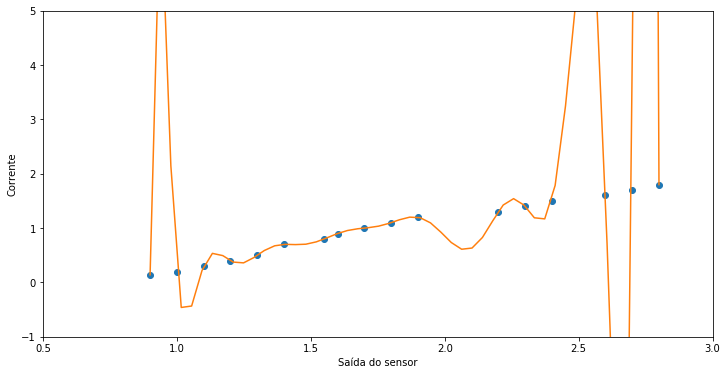

In [0]:
plot.figure(figsize=(12,6))
plot.axis([.5, 3, -1, 5])
plot.xlabel('Saída do sensor')
plot.ylabel('Corrente')
plot.plot(x,y,'o',x_lagrange,y_lagrange,'-')

# <font color='green' style='font-size: 30px;'>Splines</font>
<hr style='border: 2px solid red;'>

### Metódo Splines

#### Implementação

*Funções*

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>montarMatrix</b> - Monta a matriz contendo as condições para construção das splines</li>
    <li><b>montarPols</b> - Retorna uma lista em que cada item contém os três coeficientes de cada spline</li>
    <li><b>montarY</b> - análoga a montarMatrix</li>
    <li><b>pol</b> - Evalua o valor de $y_{spline}$, levando em conta o intervalo em que $x$ se encontra </li>
</ul>

In [0]:
pols = montarPols(np.linalg.solve(montarMatriz(x), montarY(y)))

x_spline = np.linspace(x[0], x[-1], num=50, endpoint=False)
y_spline = np.zeros(50)

for i in range(50):
  y_spline[i] = pol(x_spline[i],pols[np.searchsorted(x, x_spline[i], side= 'right')-1])    

    

### Resultados

In [0]:
print('Polinômios interpoladores:\n')

for i in range(len(pols)):
  print('{:.2f}* x^2  +  {:.2f}* x   +   {:.2f}, \t\t {:.2f} <= x <= {:.2f}'.format(pols[i][0],pols[i][1],pols[i][2],x[i],x[i+1]))

Polinômios interpoladores:

-0.40* x^2  +  0.60* x   +   0.00, 		 0.90 <= x <= 1.00
7.27* x^2  +  -14.40* x   +   7.33, 		 1.00 <= x <= 1.10
10.35* x^2  +  -18.42* x   +   8.44, 		 1.10 <= x <= 1.20
3.59* x^2  +  -6.04* x   +   2.81, 		 1.20 <= x <= 1.30
5.67* x^2  +  -9.53* x   +   4.27, 		 1.30 <= x <= 1.40
-5.85* x^2  +  8.30* x   +   -2.59, 		 1.40 <= x <= 1.55
4.40* x^2  +  -6.50* x   +   2.70, 		 1.55 <= x <= 1.60
-12.46* x^2  +  15.27* x   +   -4.33, 		 1.60 <= x <= 1.70
-5.11* x^2  +  6.05* x   +   -1.44, 		 1.70 <= x <= 1.80
-2.34* x^2  +  2.78* x   +   -0.48, 		 1.80 <= x <= 1.90
-5.41* x^2  +  6.19* x   +   -1.43, 		 1.90 <= x <= 2.20
0.82* x^2  +  -0.53* x   +   0.34, 		 2.20 <= x <= 2.30
-0.27* x^2  +  0.47* x   +   0.11, 		 2.30 <= x <= 2.40
-7.32* x^2  +  6.61* x   +   -1.22, 		 2.40 <= x <= 2.60
2.59* x^2  +  -1.71* x   +   0.51, 		 2.60 <= x <= 2.70
0.29* x^2  +  0.06* x   +   0.17, 		 2.70 <= x <= 2.80


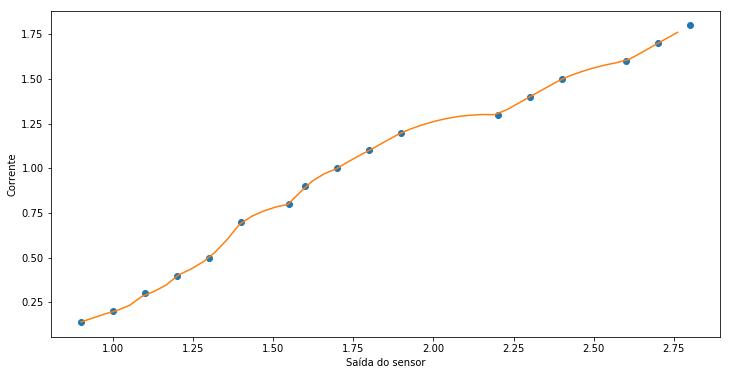

In [0]:
plot.figure(figsize=(12,6))
plot.plot(x,y,'o', x_spline,y_spline,'-')
plot.xlabel('Saída do sensor')
plot.ylabel('Corrente')
plot.show()

# <font color='green' style='font-size: 30px;'>Comparações</font>
<hr style='border: 2px solid red;'>



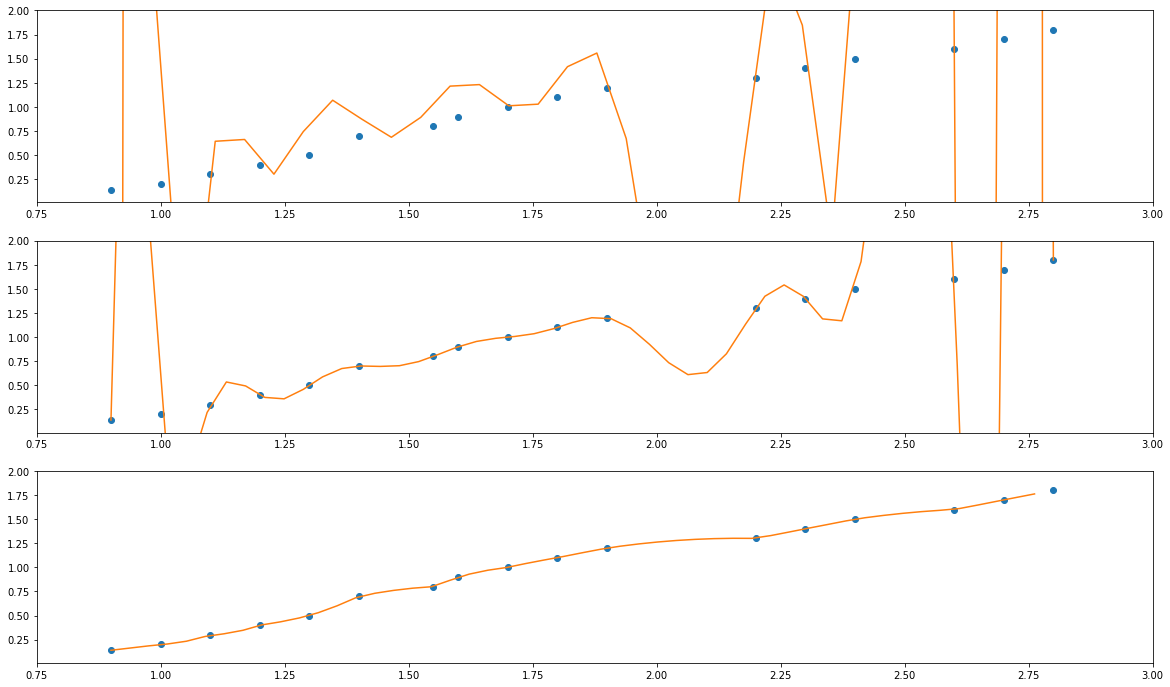

In [0]:
plot.figure(figsize=(20,12))

ax1 = plot.subplot(311)
plot.plot(x,y,'o',x_direto,y_direto,'-')
#plot.xlabel('Método direto')

ax2 = plot.subplot(312, sharex=ax1,sharey=ax1)
plot.plot(x,y,'o',x_lagrange,y_lagrange,'-')
#plot.xlabel('Método de Lagrange')

ax3 = plot.subplot(313, sharex=ax1, sharey=ax1)
plot.plot(x,y,'o', x_spline,y_spline,'-')
#plot.xlabel('Splines')

plot.xlim(0.75, 3.0)
plot.ylim(0.01, 2.0)

plot.show()


## Conclusões

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Com os resutados obtidos no tópico de comparação, fica claro que o metódo das Splines é o mais robusto e que melhor se adequa a modelagem dos dados apresentados, não apresentando grandes desvios do caminho intuitivo da curva, diferentemente dos resultados obtidos com os métodos diretos.

Um fenômeno notável é uma diferença sensível entre o traçado dos gráficos dos polinômios obtidos com a interpolação direta e interpolação de Lagrange. Ambos representam formalmente o mesmo polinômio, no entanto cada método está submetido a diferentes erros de aproximação em tempo de computação, gerando saídas ligeiramente diferentes.</p>

